# Exploring Dimension Reduction
We Try to apply supervised machine learning techniques on the publicaly avaliable Wine dataset.
We use dimension reduction techniques (PCA, LDA and Kernel) to prevent overfitting and investigate its effectiveness on the test dataset.



## Explained variance for each feature

we first determine the variance expalained by each wine feature. We conclude that 2 to 3 features might be enough for prediction

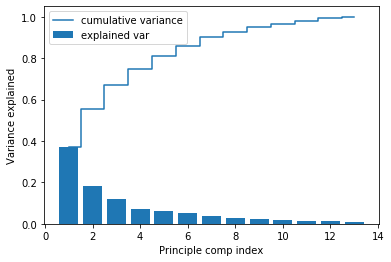

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_moons



df_wine=pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)
X,Y=df_wine.iloc[:,1:], df_wine.iloc[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)
sc=StandardScaler()
X_train_std,X_test_std=sc.fit_transform(X_train), sc.transform(X_test)
#working on the training set

cov_X_train= np.cov(X_train_std.T)
eig, eigv=np.linalg.eig(cov_X_train)
sorted_importance=sorted(eig/(eig.sum()),reverse=True)
cumu_sorted_importance=np.cumsum(sorted(eig/(eig.sum()),reverse=True))
plt.bar(range(1,14),sorted_importance,label='explained var')
plt.xlabel('Principle comp index')
plt.ylabel('Variance explained')
plt.step(range(1,14),cumu_sorted_importance,where='mid',label='cumulative variance')
plt.legend(loc='best')
plt.show()



## LogisticRegression after PCA (non supervised)
we fit a logistic Regression after applying PCA and evaluate the train/test accuracy

In [15]:
#transform the axis, by collecting eigenvectors then 
eigen_pairs=[(np.abs(eig[i]),eigv[:,i]) for i in range(len(eig))]
eigen_pairs.sort(key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
X_new_PCA=X_train_std.dot(w)
colors=['r','b','g']
markers=['s','x','o']


lr=LogisticRegression(solver='lbfgs',multi_class='auto')
pc= PCA(n_components=2,svd_solver='auto')
pc.fit(X_train_std)
X_train_PCA=pc.transform(X_train_std)
X_test_PCA=pc.transform(X_test_std)
lr.fit(X_train_PCA,Y_train)
y_predict=lr.predict(X_test_PCA)
print("score for training set: ",lr.score(X_train_PCA,Y_train))
print("score for testing set: ",lr.score(X_test_PCA,Y_test))






score for training set:  0.9838709677419355
score for testing set:  0.9259259259259259


## LogisticRegression after LDA (supervised)
we fit a logistic Regression after applying LDA and evaluate the train/test accuracy

In [18]:
#LDA

lr2=LogisticRegression(random_state=1,solver='lbfgs',multi_class='auto')
ld=LDA(n_components=2,solver='svd')
X_train_lda=ld.fit_transform(X_train_std,Y_train)
X_test_lda=ld.transform(X_test_std)
lr2.fit(X_train_lda,Y_train)
print("score for training: ",lr2.score(X_train_lda,Y_train))
print("score for testing: ",lr2.score(X_test_lda,Y_test))

score for training:  1.0
score for testing:  1.0


## reducing dimensions using non-linear kernel and apply it to make_moons

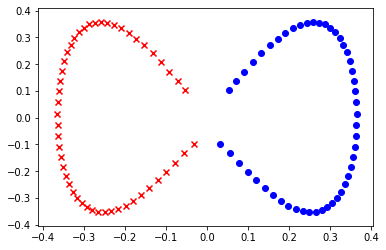

In [17]:
Xm,ym=make_moons(random_state=123)
kerpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
Xm_ker=kerpca.fit_transform(Xm,ym)
plt.scatter(Xm_ker[np.where(ym==0),0],Xm_ker[np.where(ym==0),1],marker='x',color='red')
plt.scatter(Xm_ker[np.where(ym==1),0],Xm_ker[np.where(ym==1),1],marker='o',color='blue')
plt.show()